In [1]:
import sys
sys.path.append('../code')

In [2]:
import cPickle as pickle
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
from add_model_features import add_features
from model_utilities import *

In [4]:
patch_draft_dfs = get_all_dfs('../data')

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [6]:
gbr = GradientBoostingRegressor(loss='lad')
y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, '6.86', gbr, 'regressor')

In [7]:
mse_dict = {}
gbr = GradientBoostingRegressor(loss='lad')
for key in patch_draft_dfs.iterkeys():
    y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, key, gbr, 'regressor')
    mse_dict[key] = (mean_squared_error(y_test, y_old), mean_squared_error(y_test, predictions))

In [8]:
mse_dict

{'6.78': (372.54178217821777, 357.42172975442668),
 '6.79': (469.03205882352944, 363.41401816904073),
 '6.80': (540.77529411764715, 420.46079509229747),
 '6.81': (313.62901960784313, 311.68208785660909),
 '6.82': (351.7853846153846, 298.64238718747254),
 '6.83': (573.19261682242984, 424.71632691263972),
 '6.84': (636.64851851851859, 440.43543920146044),
 '6.85': (437.96112149532706, 458.87721353618838),
 '6.86': (275.51773584905652, 203.45288221949511)}

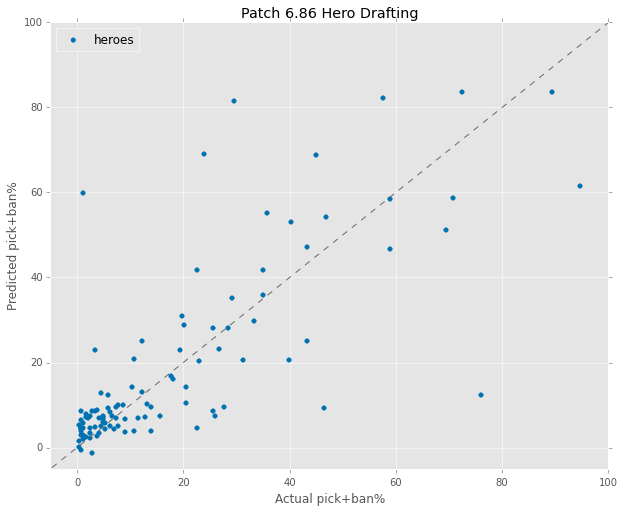

In [43]:
gbr = GradientBoostingRegressor(loss='lad')
y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, '6.86', gbr, 'regressor')
plot_scatter(y_test, predictions, '6.86', rescale=True, log=False)

In [41]:
auc_dict = {}
gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.05, n_estimators=100, subsample=0.4)
for key in patch_draft_dfs.iterkeys():
    y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, key, gbc, 'classifier', threshold=50)
    auc_dict[key] = roc_auc_score(y_test, predictions)
    
np.mean(auc_dict.values())

0.77465404335089538

In [27]:
auc_dict

{'6.78': 0.80697674418604659,
 '6.79': 0.79846743295019162,
 '6.80': 0.70925925925925926,
 '6.81': 0.80326086956521736,
 '6.82': 0.84359726295210169,
 '6.83': 0.65670103092783494,
 '6.84': 0.6497975708502024,
 '6.85': 0.78559738134206214,
 '6.86': 0.86254295532646053}

In [10]:
np.mean(auc_dict.values())

0.73184300725917706

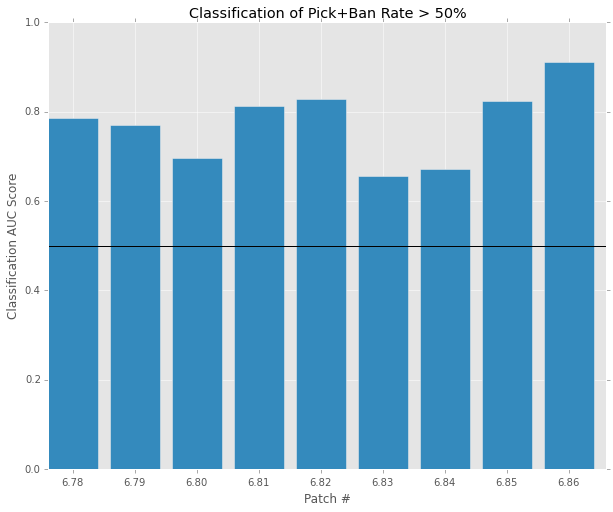

In [36]:
plt.figure(figsize=(10,8))
plt.ylim(0, 1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.bar(range(len(auc_dict)), [auc_dict[key] for key in sorted(auc_dict.keys())])
plt.xticks(np.arange(len(auc_dict))+0.4, sorted(auc_dict.keys()))
plt.xlabel('Patch #')
plt.ylabel('Classification AUC Score')
plt.title('Classification of Pick+Ban Rate > 50%')
plt.show()

In [123]:
np.mean(auc_dict.values())

0.73125727853800493

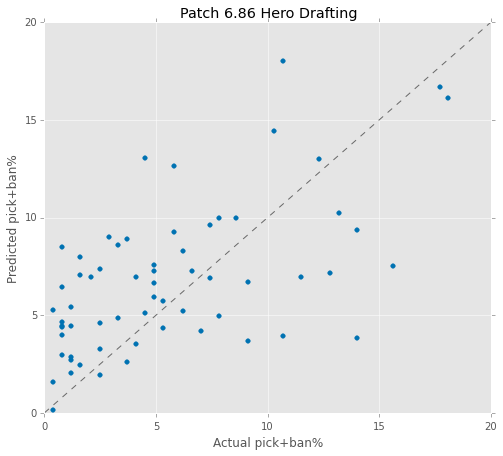

In [14]:
plt.figure(figsize=(8,7))
gbr = GradientBoostingRegressor(loss='lad')
y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, '6.86', gbr, 'regressor')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('Actual pick+ban%')
plt.ylabel('Predicted pick+ban%')
plt.title('Patch {0} Hero Drafting'.format('6.86'))
plt.plot([0, 20], [0, 20], linestyle='--', color='dimgrey')
plt.scatter(y_test, predictions*2000/np.sum(predictions), label='heroes', color='#0072B2')
plt.show()